Stephanie Chiang  
DATA 620 Summer 2025  
### Project 2:
# Bimodal Network Analysis: The Island Method

### Introduction: The Data

The bimodal network I will be examining is the [The Marvel Universe Social Network](https://www.kaggle.com/datasets/csanhueza/the-marvel-universe-social-network) from Kaggle. The dataset contains information about characters and their relationships in the Marvel Universe, which can be treated as a bipartite network with two distinct groups: characters and comics. There are 19090 nodes representing either characters or the comics they appear in. Each of the 96104 edges indicates an appearance of a character in a comic book. 

First, the edges are imported from the dataset and converted into a bipartite graph using the `networkx` library. The type attribute is used to distinguish between characters and comics.

In [116]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

# Read edges from CSV file
edges_df = pd.read_csv('marvel_edges.csv', header=0)

G = nx.Graph()

# Extract nodes with bipartite labels
heroes = edges_df['hero'].unique()
G.add_nodes_from(heroes, type='hero')

comics = edges_df['comic'].unique()
G.add_nodes_from(comics, type='comic')

# Add the edges from the dataframe
edges = list(edges_df.itertuples(index=False, name=None))
G.add_edges_from(edges)
print(G)

# Confirm first 5 nodes with their attributes
print(list(G.nodes(data=True))[:5])

Graph with 19090 nodes and 96104 edges
[('24-HOUR MAN/EMMANUEL', {'type': 'hero'}), ('3-D MAN/CHARLES CHAN', {'type': 'hero'}), ('4-D MAN/MERCURIO', {'type': 'hero'}), ('8-BALL/', {'type': 'hero'}), ('ABBOTT, JACK', {'type': 'hero'})]


### Graph Reduction

The bipartite graph is then projected onto the "hero" nodes to create a new graph where the weights of the edges represent co-appearances of characters in the same comic book.

Using the island method, the graph can be reduced to smaller subgraphs based on a threshold for the weight value for each edge. This can identify clusters of characters that frequently appear together. At a high threshold of 200, the graph can be reduced to a manageable 48 nodes.

Graph with 48 nodes and 90 edges


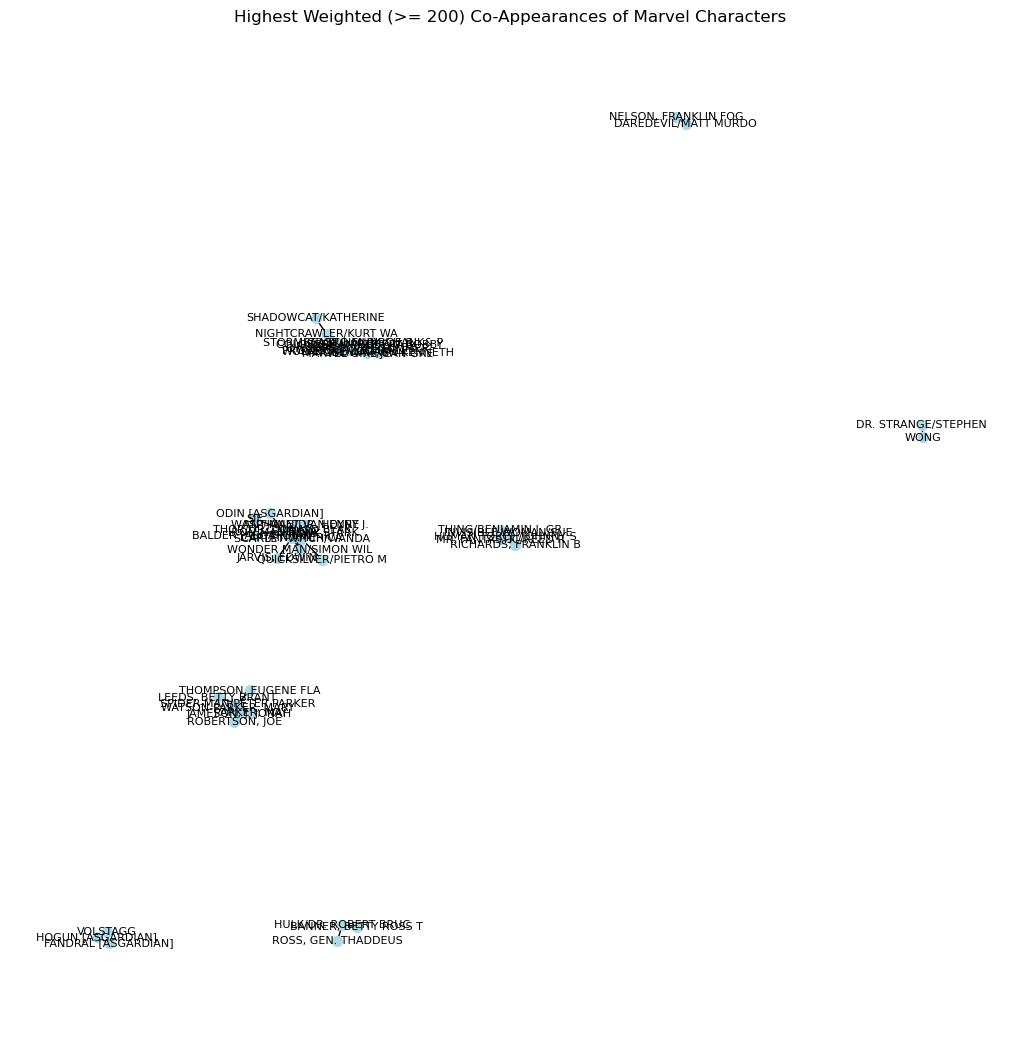

In [117]:
g_heroes = bipartite.weighted_projected_graph(G, heroes)

# Keeping only the edges with the strongest edges
threshold = 200
strong_edges = [(u, v) for u, v, d in g_heroes.edges(data=True) if d['weight'] >= threshold]

# Save as a non-destructive new graph of islands
G_island = g_heroes.edge_subgraph(strong_edges).copy()
print(G_island)

# Draw a graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_island, seed=101)
nx.draw(G_island, pos, with_labels=True, node_size=50, font_size=8, node_color='lightblue')
plt.title('Highest Weighted (>= 200) Co-Appearances of Marvel Characters')
plt.show()

These islands are still too cluttered to be helpful. The largest of these subgraphs, with only 14 nodes, can be extracted for further visualization. The resulting network of co-appearances is plotted below using the `matplotlib` library, with nodes sized by their degree and colored based on their weights.

Graph with 14 nodes and 37 edges


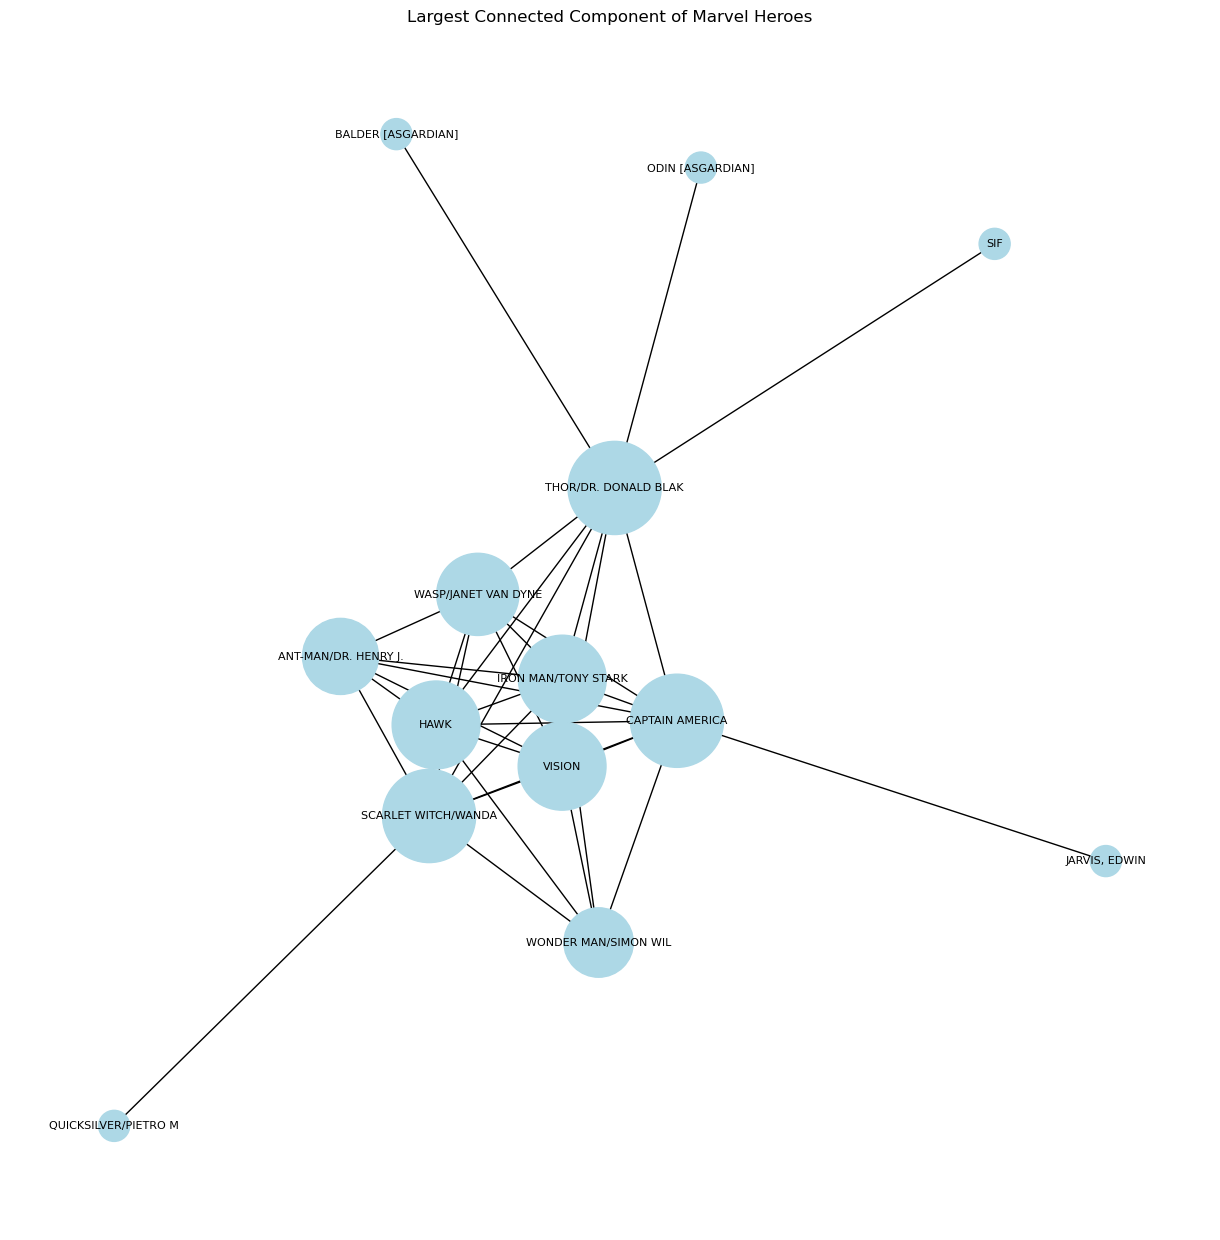

In [118]:
# Get the connected components
components = nx.connected_components(G_island)

# Get the largest subcomponent and re-graph
largest_component_nodes = max(components, key=len)
G_largest = G_island.subgraph(largest_component_nodes).copy()
print(G_largest)

# Draw the graph with nodes sized by their degree
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_largest, seed=101)
node_sizes = [500 * G_largest.degree(n) for n in G_largest.nodes()]
nx.draw(G_largest, pos, with_labels=True, node_size=node_sizes, node_color="lightblue", font_size=8)
plt.title('Largest Connected Component of Marvel Heroes')
plt.show()

### What can we infer about these distinct groups?

We can infer based on the resulting graph of the strongest weighted connections that the characters who appear here may be among the most popular or famous. They may also be more likely to appear as a group of heroes in comics like the Avengers, rather than in solo storylines. The branches that represent characters that lead off from the central cluster, connected only to one of the "main" characters, are more likely to be sidekicks or villains that feature frequently with a specific hero.

The extraneous connections removed by the island method may not have represented any actual character interactions or importance in the storyline. By analyzing the comic network for co-appearances, we are left with data on what may be the most enduring and bankable characters and comics.